In [1]:
import nappy.nappy_api
import pandas as pd 
# import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import calendar
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date

In [2]:
adjusted_csv_path = os.path.join(os.getcwd(), 'final_adjusted_2011_2024.csv')

def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.999, 9.999], np.NaN, inplace=True)  
      
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1') or selected_columns.startswith('starttime') or selected_columns.startswith('Date'):

            if selected_columns.startswith('pm1'):

                variable = selected_columns.find('_') + 1
                
                selected_variable = selected_columns[variable: (variable + 10)]

                if selected_columns.startswith('pm1'):
                    
                    if selected_variable == 'scattering':

                        variable = selected_columns.find('angstrom')
                                    
                        if variable == -1:
                            scattering_coeff.append(selected_columns)
                            
                        else:
                            scattering_angstrom.append(selected_columns)
                
                    else: 
                        variable = selected_columns.find('angstrom')
                        
                        if variable == -1:
                            absorption_coeff.append(selected_columns)
                            
                        else:
                            absorption_angstrom.append(selected_columns)
                        
            elif selected_columns.startswith('starttime'):

                starttime.append(selected_columns)
                
            else:
                date.append(selected_columns)
                        
    return starttime, absorption_coeff, absorption_angstrom, scattering_coeff, scattering_angstrom, date, adjusted_csv
    
adjusted_coefficients(adjusted_csv_path)

(['starttime'],
 ['pm10_absorption_coeff_450',
  'pm10_absorption_coeff_550',
  'pm10_absorption_coeff_700',
  'pm1_absorption_coeff_450',
  'pm1_absorption_coeff_550',
  'pm1_absorption_coeff_700'],
 ['pm10_absorption_angstrom_450_550',
  'pm10_absorption_angstrom_450_700',
  'pm10_absorption_angstrom_550_700',
  'pm1_absorption_angstrom_450_550',
  'pm1_absorption_angstrom_450_700',
  'pm1_absorption_angstrom_550_700'],
 ['pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700',
  'pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700'],
 ['pm10_scattering_angstrom_450_550',
  'pm10_scattering_angstrom_450_700',
  'pm10_scattering_angstrom_550_700',
  'pm1_scattering_angstrom_450_550',
  'pm1_scattering_angstrom_450_700',
  'pm1_scattering_angstrom_550_700'],
 ['Date'],
         starttime                 Date  pm10_scattering_coeff_450  \
 0        24.00000  2011-01-24 00:00:00                       2.17   
 1        24.

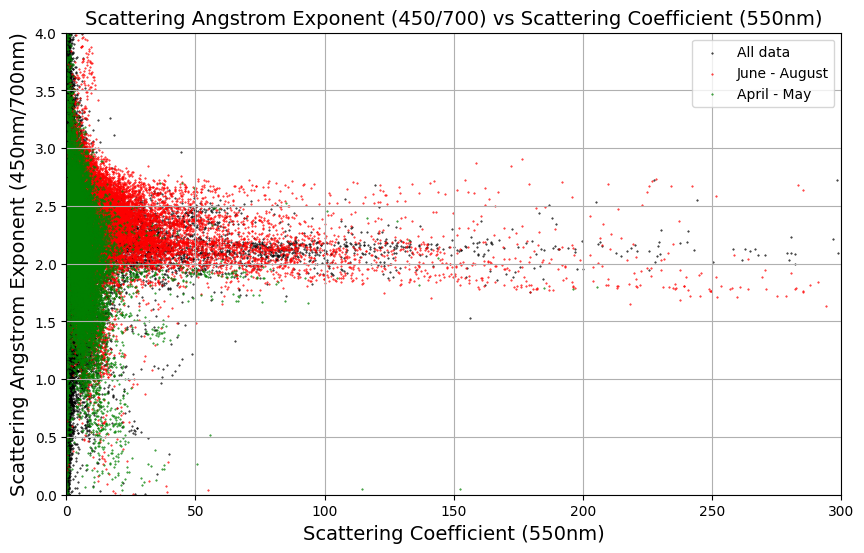

In [15]:
def aerosol_plots(columns):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime':columns[0],
        'Date':columns[5]
    }
    
    new_dataframe = []
    
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_550' in coeff:
                new_dataframe.append(coeff)
                
            elif 'pm1_scattering_angstrom_450_700' in coeff:
                new_dataframe.append(coeff)     
                
            elif 'Date' in coeff:
                new_dataframe.append(coeff)
    
    highlighted_months = {'04':'green', '05':'green', '06': 'red', '07': 'red', '08': 'red'}
    
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m')
    df['Date'] = df['Date'].astype(str)
    unique_years = sorted(df['Date'].unique())
    
    color_mapping = {
    '04_05': 'green',  
    '06_08':'red',
    'Other': 'black'   
    }
    
    def assign_color(highlighted_months):

        if highlighted_months in ['04', '05']:
            return 'green'
        elif highlighted_months in ['06', '07', '08']:
            return 'red'
        else:
            return 'black'

    assign_color(highlighted_months)  
    
    df['Color'] = df['Date'].apply(assign_color)

    plt.figure(figsize=(10, 6))
    
    for color in ['black', 'red', 'green']:
        subset = df[df['Color'] == color]
        plt.scatter(
            subset['pm1_scattering_coeff_550'],
            subset['pm1_scattering_angstrom_450_700'],
            c=color,
            s=0.2,
            label={'green': "April - May", 'red': "June - August", 'black': "All data"}[color]
        )

    plt.title('Scattering Angstrom Exponent (450/700) vs Scattering Coefficient (550nm)', fontsize=14)
    plt.xlabel('Scattering Coefficient (550nm)', fontsize=14)
    plt.ylabel('Scattering Angstrom Exponent (450nm/700nm)', fontsize=14)
    plt.legend(loc='upper right')
    plt.xlim(0, 300)
    plt.ylim(0, 4)
    plt.grid()
    plt.show()
    
columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns)

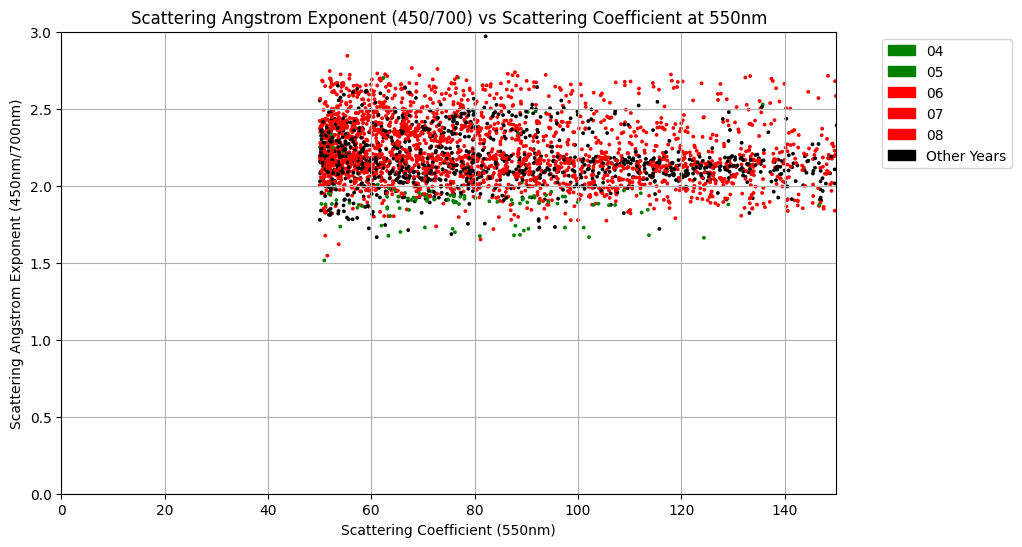

In [4]:
def aerosol_plots(columns):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime':columns[0],
        'Date': columns[5]
    }
    
    new_dataframe = []
    
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_450' in coeff:
                new_dataframe.append(coeff)
                
            elif 'pm1_scattering_angstrom_450_700' in coeff:
                new_dataframe.append(coeff)   
            
            elif 'Date' in coeff:
                new_dataframe.append(coeff)          
            
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m')
    df['Date'] = df['Date'].astype(str)
    
    filtered_values = []
    
    for value in zip(df['pm1_scattering_coeff_450'], df['pm1_scattering_angstrom_450_700'], df['Date']):
        if value[0] > 50 and value[1] > 1.5:
            filtered_values.append(value)
            
    highlighted_years = {'04':'green', '05':'green', '06': 'red', '07': 'red', '08': 'red'}
    filtered_dataframe = pd.DataFrame(filtered_values, columns=['pm1_scattering_coeff_450', 'pm1_scattering_angstrom_450_700', 'Date'])
    unique_years = sorted(df['Date'].unique())
    
    colors = {year: highlighted_years.get(year, 'black') for year in unique_years}
    color_list = [colors[year] for year in filtered_dataframe['Date']]
        
    plt.figure(figsize= (10,6))
    plt.scatter(filtered_dataframe['pm1_scattering_coeff_450'], filtered_dataframe['pm1_scattering_angstrom_450_700'], c=color_list, s=3)
    plt.title('Scattering Angstrom Exponent (450/700) vs Scattering Coefficient at 550nm')
    # plt.legend(key, bbox_to_anchor=(1, 1), loc='upper right')
    plt.xlabel('Scattering Coefficient (550nm)')
    plt.ylabel('Scattering Angstrom Exponent (450nm/700nm)')
    plt.xlim(0, 150)
    plt.ylim(0, 3)
    # plt.xlim(0, 400)
    # plt.ylim(0, 5)
    
    legend_handles = [mpatches.Patch(color=color, label=str(year)) for year, color in highlighted_years.items()]
    legend_handles.append(mpatches.Patch(color='black', label='Other Years'))
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid()
    plt.show()
    plt.close()    
            
columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns)

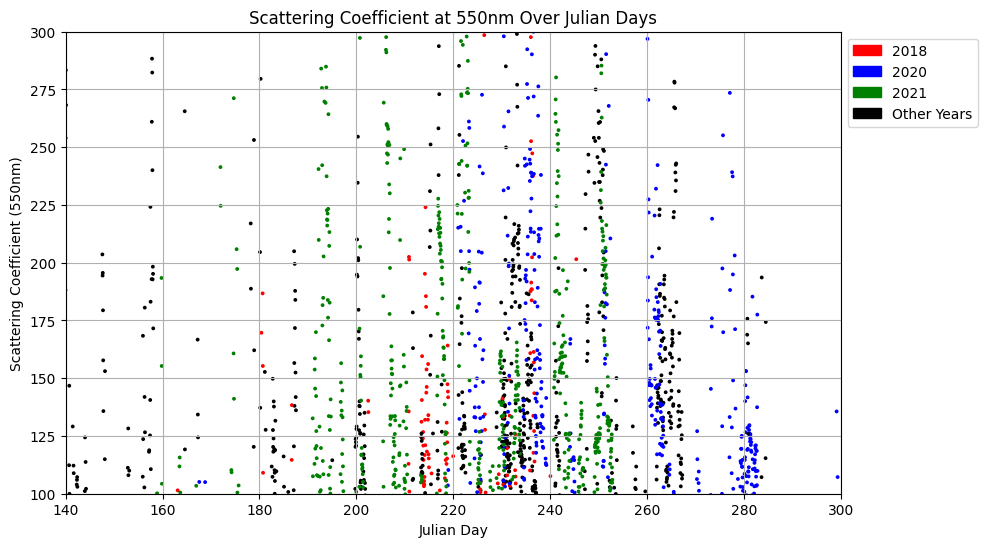

In [5]:
def aerosol_plots(columns):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime':columns[0],
        'Date': columns[5]
    }
    
    new_dataframe = []
    
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_450' in coeff:
                new_dataframe.append(coeff)
                
            elif 'starttime' in coeff:
                new_dataframe.append(coeff)         
                
            elif 'Date' in coeff:
                new_dataframe.append(coeff)  
    
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()
    
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
    
    df = df.drop(df[df['pm1_scattering_coeff_450'] < 50].index)
    df['Date'] = df['Date'].astype(str)

    highlighted_years = {'2018': 'red', '2020': 'blue', '2021': 'green'}
    
    unique_years = sorted(df['Date'].unique())

    colors = {year: highlighted_years.get(year, 'black') for year in unique_years}
    color_list = [colors[year] for year in df['Date']]

    plt.figure(figsize=(10, 6))
    plt.scatter(df['starttime'], df['pm1_scattering_coeff_450'], c=color_list, s=3)

    plt.title('Scattering Coefficient at 550nm Over Julian Days')
    plt.xlabel('Julian Day')
    plt.ylabel('Scattering Coefficient (550nm)')
    plt.xlim(140, 300)
    plt.ylim(100, 300)
    plt.grid()
    
    legend_handles = [mpatches.Patch(color=color, label=str(year)) for year, color in highlighted_years.items()]
    legend_handles.append(mpatches.Patch(color='black', label='Other Years'))
    plt.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc='upper left')

    plt.show()    
    
columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns)

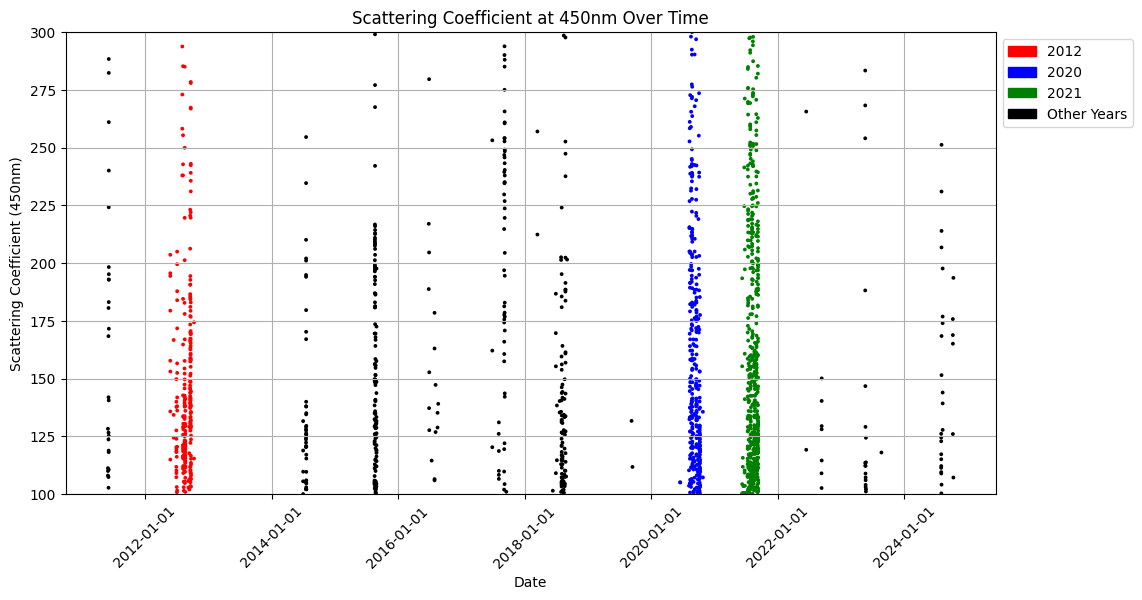

In [6]:
def aerosol_plots(columns):
    dataframe = columns[6]
    new_dataframe = []
    variable_columns = []

    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime': columns[0],
        'Date': columns[5]
    }
        
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_450' in coeff:
                new_dataframe.append(coeff)
                
            elif 'starttime' in coeff:
                new_dataframe.append(coeff)         
                
            elif 'Date' in coeff:
                new_dataframe.append(coeff)  
    
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()

    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year.astype(str)  

    df = df[df['pm1_scattering_coeff_450'] >= 100]

    highlighted_years = {'2012': 'red', '2020': 'blue', '2021': 'green'}

    df['Color'] = df['Year'].map(lambda x: highlighted_years.get(x, 'black'))

    plt.figure(figsize=(12, 6))
    plt.scatter(df['Date'], df['pm1_scattering_coeff_450'], c=df['Color'], s=3)

    plt.title('Scattering Coefficient at 450nm Over Time')
    plt.xlabel('Date')
    plt.ylabel('Scattering Coefficient (450nm)')

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)  

    plt.ylim(100, 300)
    plt.grid()

    legend_handles = [mpatches.Patch(color=color, label=year) for year, color in highlighted_years.items()]
    legend_handles.append(mpatches.Patch(color='black', label='Other Years'))
    plt.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc='upper left')

    plt.show()    

columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns)


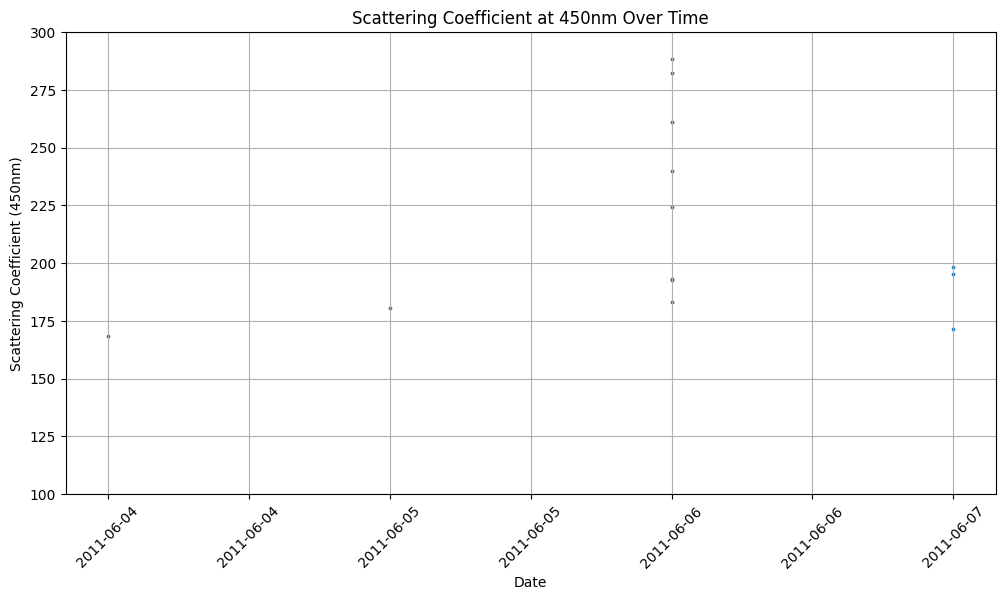

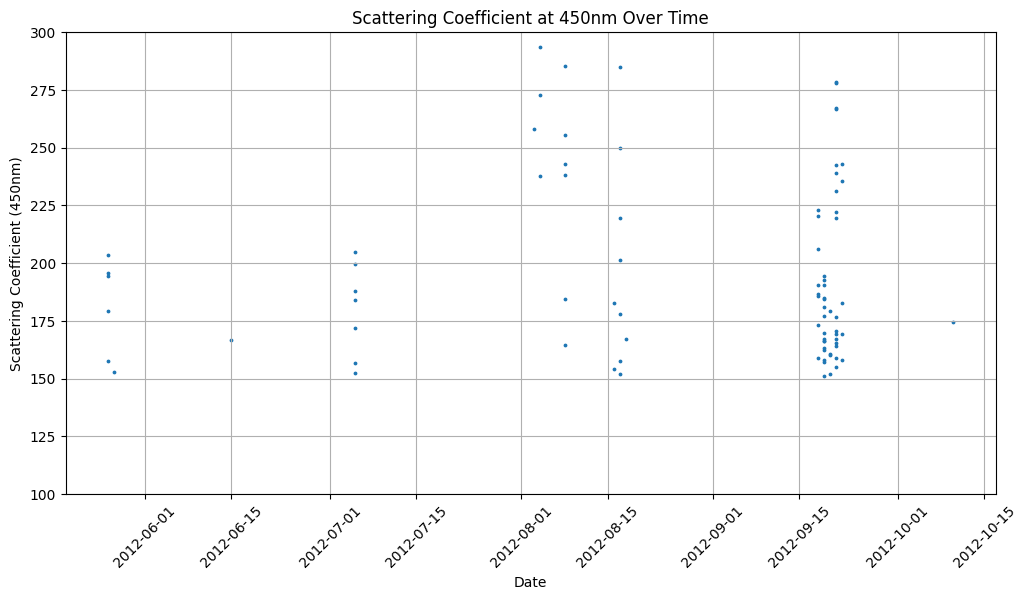

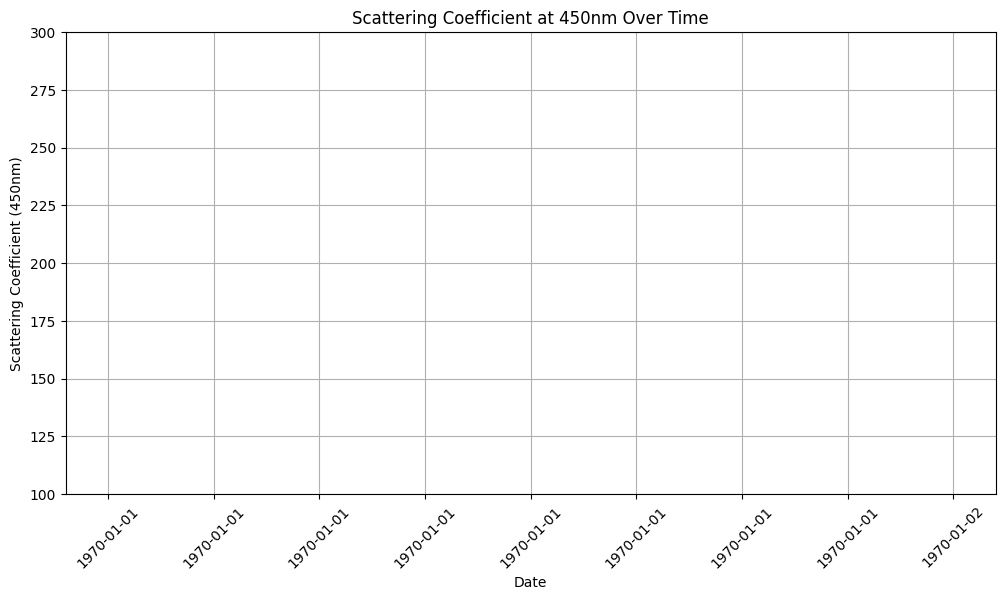

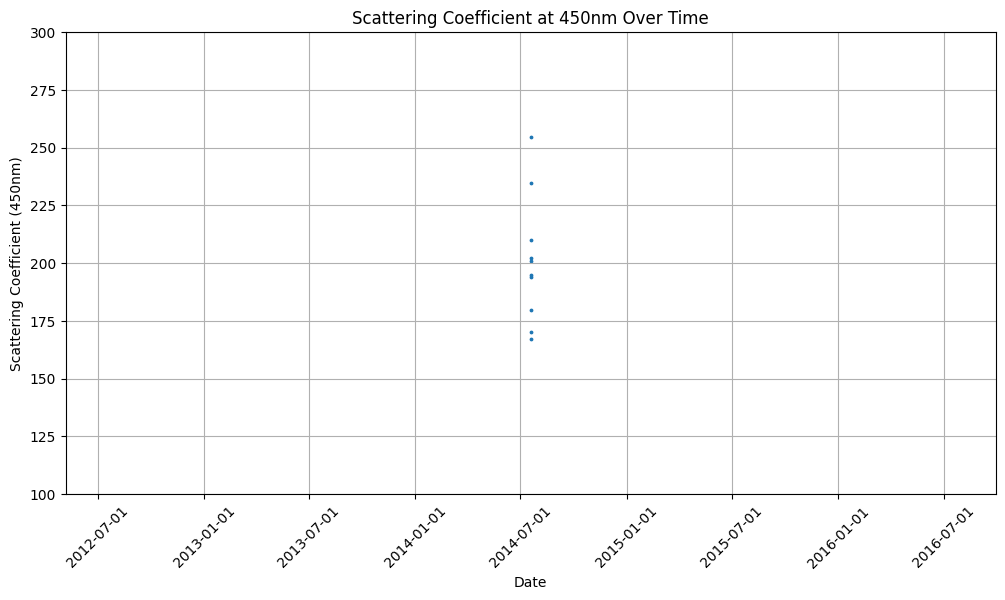

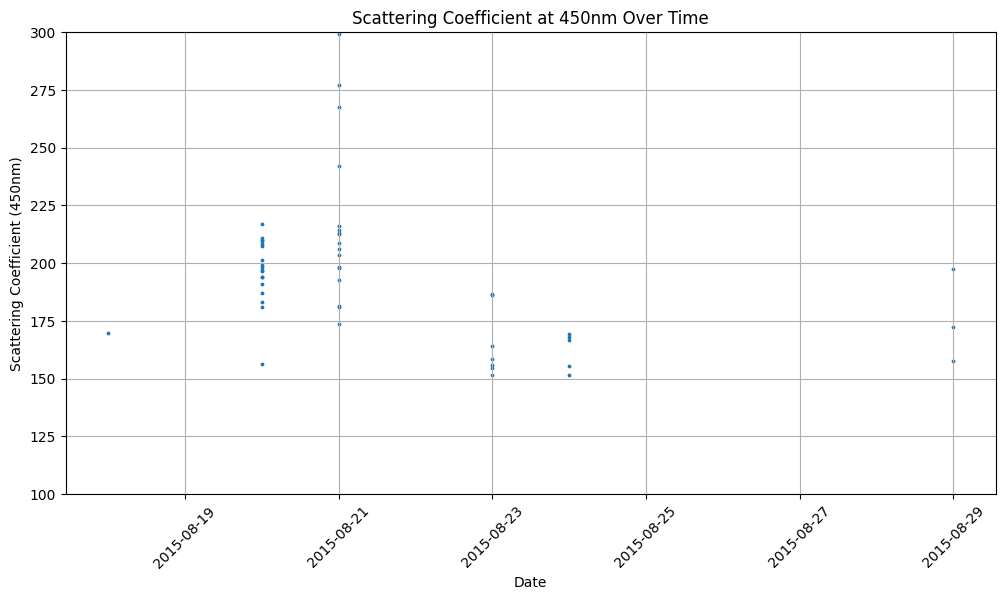

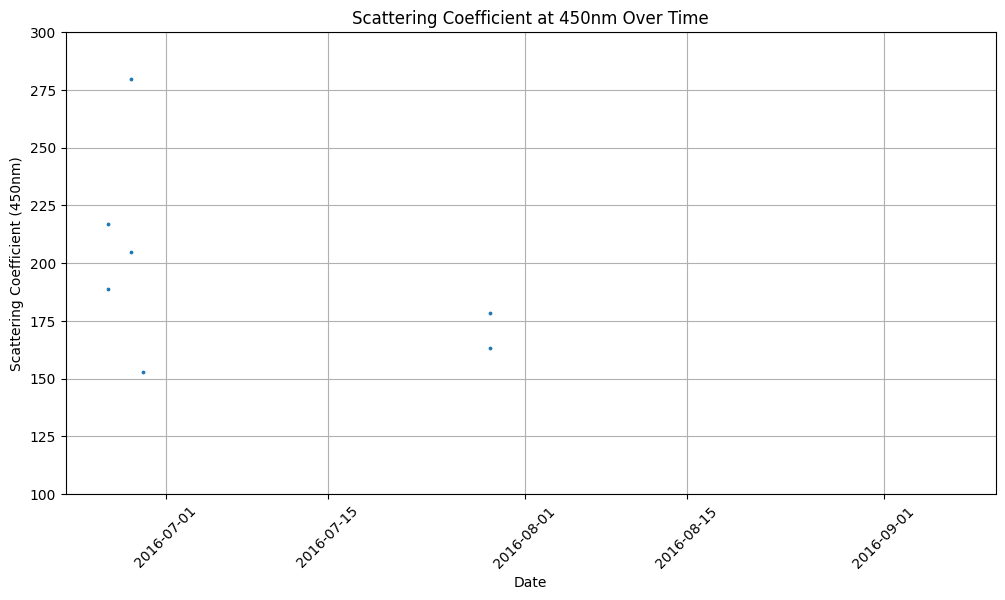

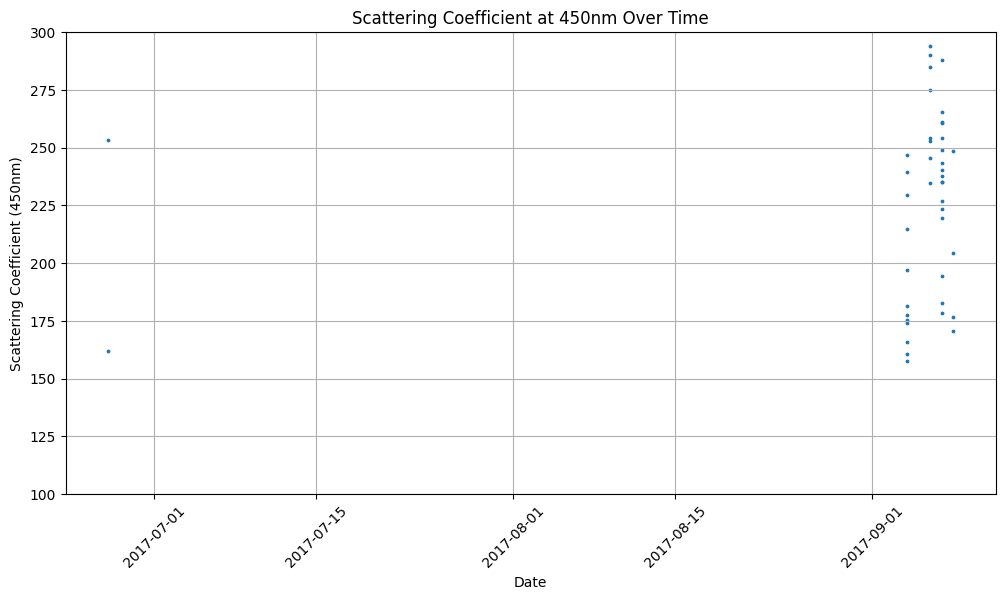

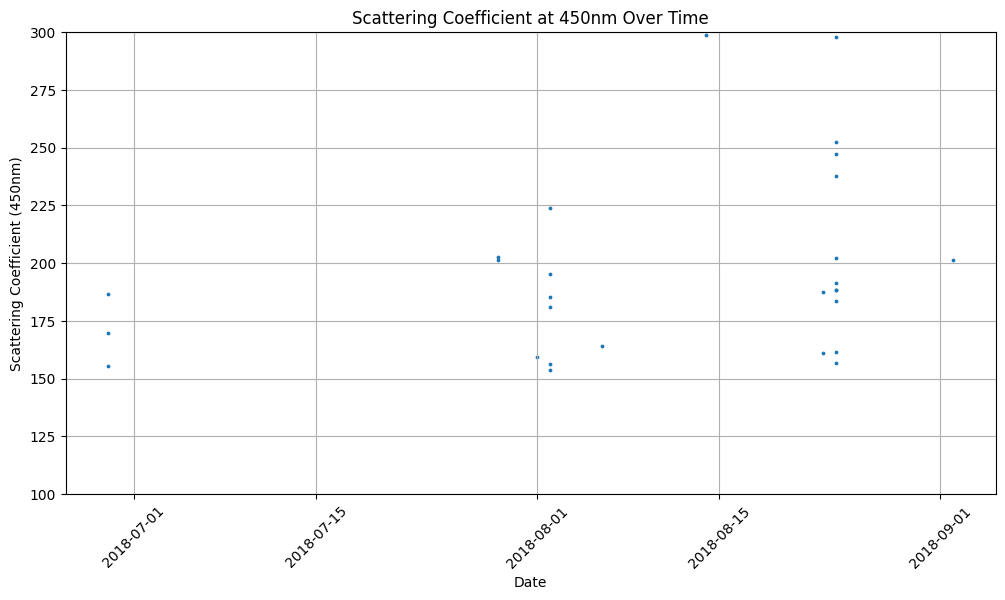

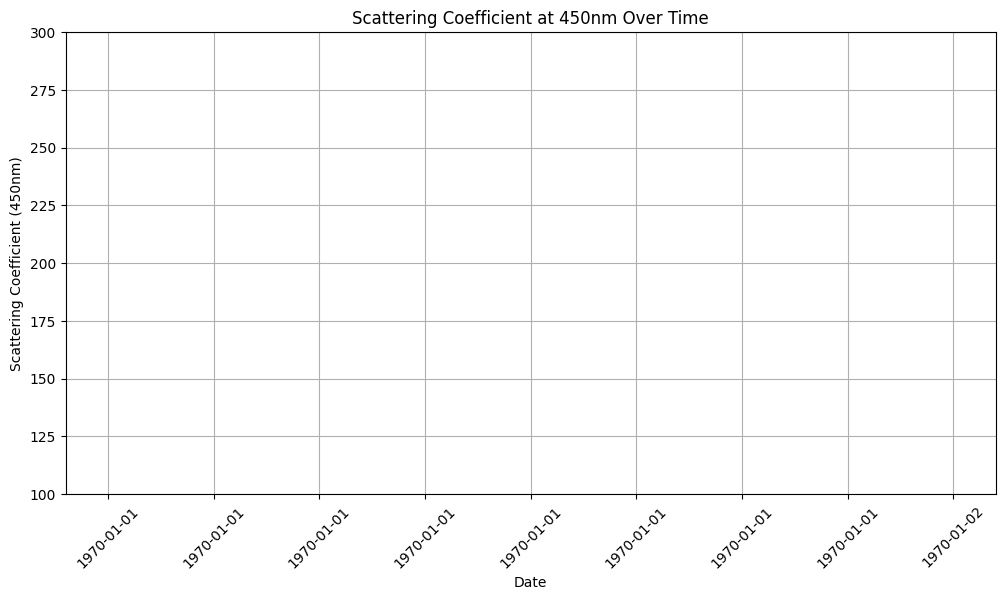

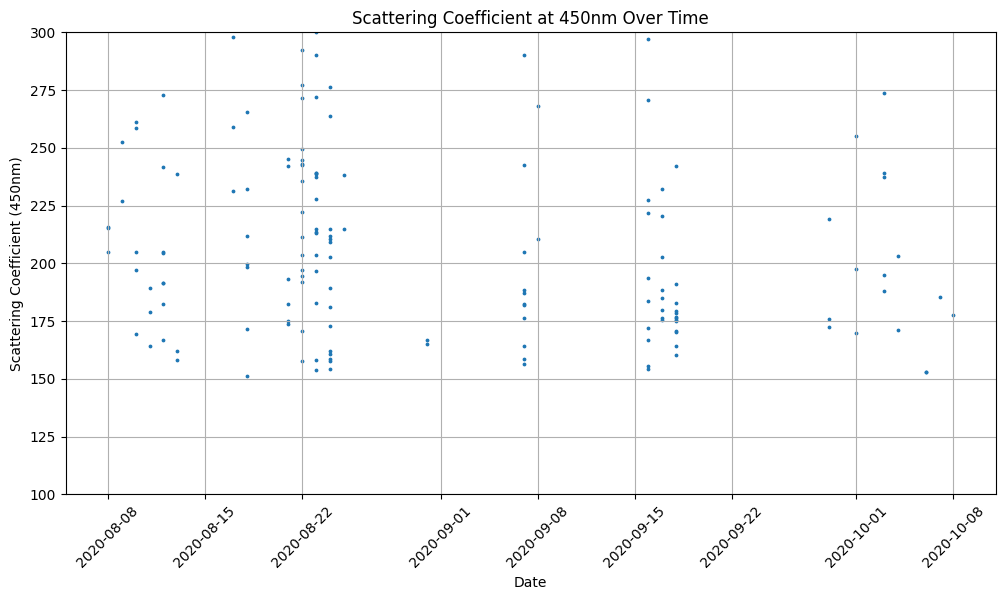

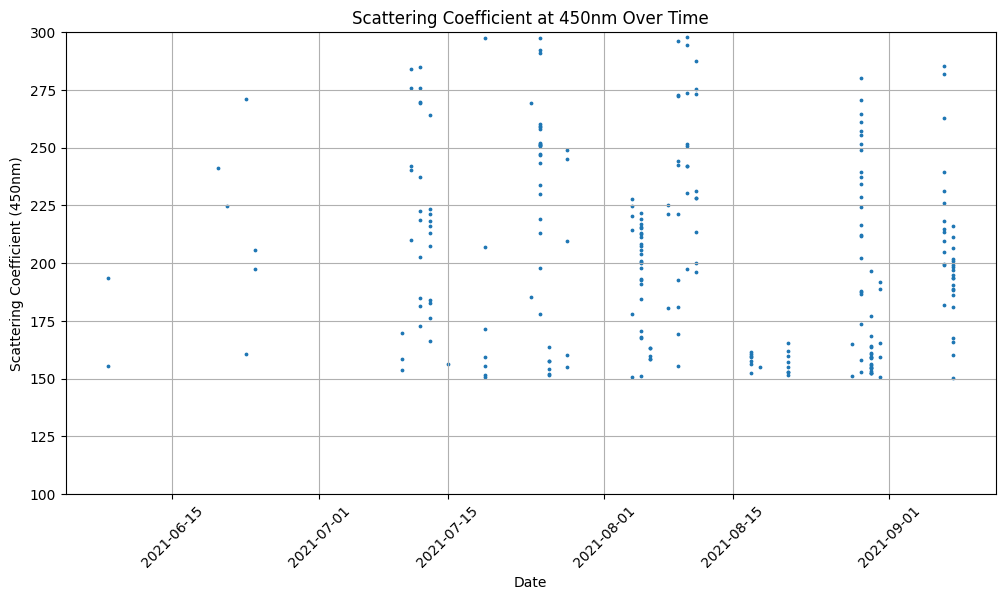

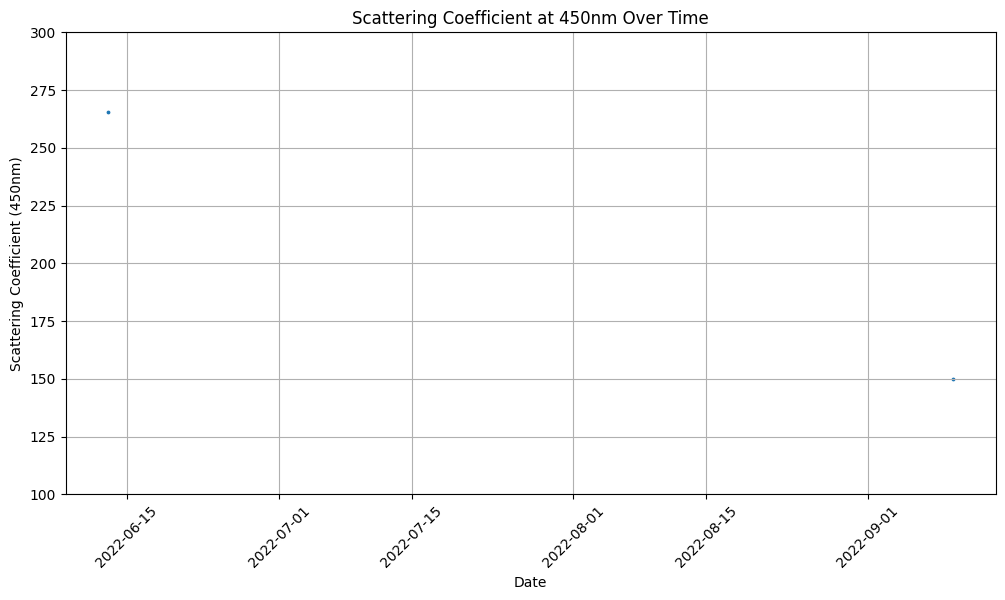

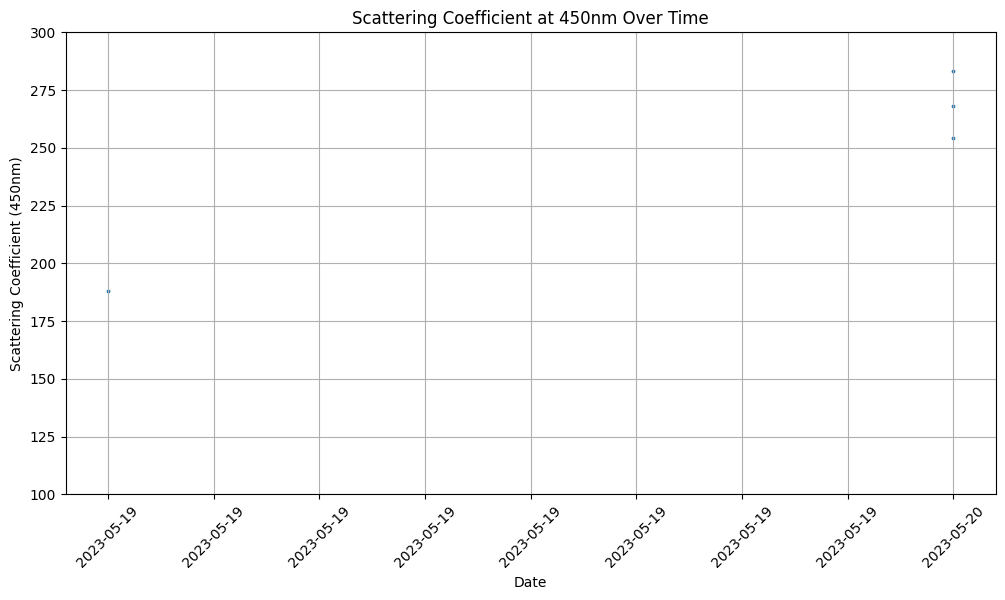

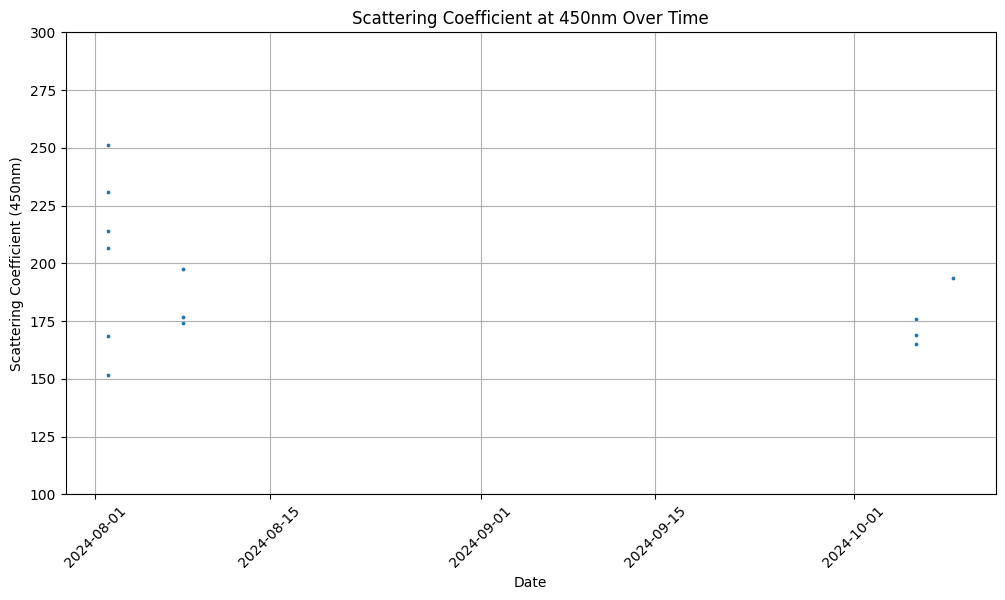

Year: 2011
Series([], dtype: int64)
Year: 2012
Date
2012-09-18     8
2012-09-19    16
2012-09-20     4
2012-09-21    19
2012-09-22     5
dtype: int64
Year: 2013
Series([], dtype: int64)
Year: 2014
Series([], dtype: int64)
Year: 2015
Date
2015-08-18     1
2015-08-20    20
2015-08-21    21
2015-08-23     7
2015-08-24     5
2015-08-29     3
dtype: int64
Year: 2016
Series([], dtype: int64)
Year: 2017
Series([], dtype: int64)
Year: 2018
Date
2018-08-01     1
2018-08-02     7
2018-08-06     1
2018-08-14     3
2018-08-23     2
2018-08-24    15
dtype: int64
Year: 2019
Series([], dtype: int64)
Year: 2020
Date
2020-08-08     9
2020-08-09     6
2020-08-10     5
2020-08-11     3
2020-08-12    15
2020-08-13     4
2020-08-17     3
2020-08-18     7
2020-08-21     6
2020-08-22    24
2020-08-23    23
2020-08-24    16
2020-08-25     2
2020-08-31     2
dtype: int64
Year: 2021
Date
2021-08-04     6
2021-08-05    24
2021-08-06     5
2021-08-07    20
2021-08-08    24
2021-08-09    20
2021-08-10    24
2021-0

In [7]:
def aerosol_plots(columns):
    dataframe = columns[6]
    new_dataframe = []
    variable_columns = []

    

    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime': columns[0],
        'Date': columns[5]
    }
        
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_450' in coeff:
                new_dataframe.append(coeff)
                
            elif 'starttime' in coeff:
                new_dataframe.append(coeff)         
                
            elif 'Date' in coeff:
                new_dataframe.append(coeff)  
    
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
    df = df[df['pm1_scattering_coeff_450'] >= 150]
    df['Date'] = pd.to_datetime(df['Date'])

    target_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 
    original_target_months = [5, 6, 7, 8, 9, 10]  
    target_months = [8,9]  


    for year in target_years:
       
        filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month.isin(original_target_months))]        
        plt.figure(figsize=(12, 6))
        plt.scatter(filtered_df['Date'], filtered_df['pm1_scattering_coeff_450'], s=3)
        plt.title('Scattering Coefficient at 450nm Over Time')
        plt.xlabel('Date')
        plt.ylabel('Scattering Coefficient (450nm)')
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.xticks(rotation=45)
        plt.ylim(100, 300)
        plt.grid()
        plt.show()    
            
    for year in target_years:
        if year == 2012:
            filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == target_months[1])]
            grouped = filtered_df.groupby('Date').size() 
            print(f"Year: {year}")
            print(grouped)
        else:
            filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == target_months[0])]
            grouped = filtered_df.groupby('Date').size() 
            print(f"Year: {year}")
            print(grouped) 

columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns)


In [10]:
"TABLE MOUNTAIN DATA"
table_mountain_data = os.path.join(os.getcwd(), 'table_mountain_2019_2024_aerosol_data.csv')

In [12]:
def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.999, 9.999], np.NaN, inplace=True)  
      
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1') or selected_columns.startswith('starttime') or selected_columns.startswith('date'):
            
            if selected_columns.startswith('pm1'):

                variable = selected_columns.find('_') + 1
                selected_variable = selected_columns[variable: (variable + 10)]

                if selected_columns.startswith('pm1'):
                   
                    if selected_variable == 'scattering':
                        
                        variable = selected_columns.find('angstrom')
                                    
                        if variable == -1:
                            scattering_coeff.append(selected_columns)
                            
                        else:
                            scattering_angstrom.append(selected_columns)
                
                    else: 
                        variable = selected_columns.find('angstrom')
                        
                        if variable == -1:
                            absorption_coeff.append(selected_columns)
                            
                        else:
                            absorption_angstrom.append(selected_columns)
                        
            elif selected_columns.startswith('starttime'):

                starttime.append(selected_columns)
                
            else:
                date.append(selected_columns)
                        
    return starttime, absorption_coeff, absorption_angstrom, scattering_coeff, scattering_angstrom, date, adjusted_csv
    
adjusted_coefficients(table_mountain_data)

(['starttime'],
 ['pm1_absorption_coeff_450',
  'pm1_absorption_coeff_550',
  'pm1_absorption_coeff_700',
  'pm10_absorption_coeff_450',
  'pm10_absorption_coeff_550',
  'pm10_absorption_coeff_700',
  'pm1_ssa_450',
  'pm1_ssa_550',
  'pm1_ssa_700',
  'pm10_ssa_450',
  'pm10_ssa_550',
  'pm10_ssa_700'],
 ['pm1_absorption_angstrom_450_550',
  'pm1_absorption_angstrom_450_700',
  'pm1_absorption_angstrom_550_700',
  'pm10_absorption_angstrom_450_550',
  'pm10_absorption_angstrom_450_700',
  'pm10_absorption_angstrom_550_700'],
 ['pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700',
  'pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700'],
 ['pm1_scattering_angstrom_450_550',
  'pm1_scattering_angstrom_450_700',
  'pm1_scattering_angstrom_550_700',
  'pm10_scattering_angstrom_450_550',
  'pm10_scattering_angstrom_450_700',
  'pm1_scattering_angstrom_550_700.1'],
 ['date'],
        starttime                 date  pm1_abs

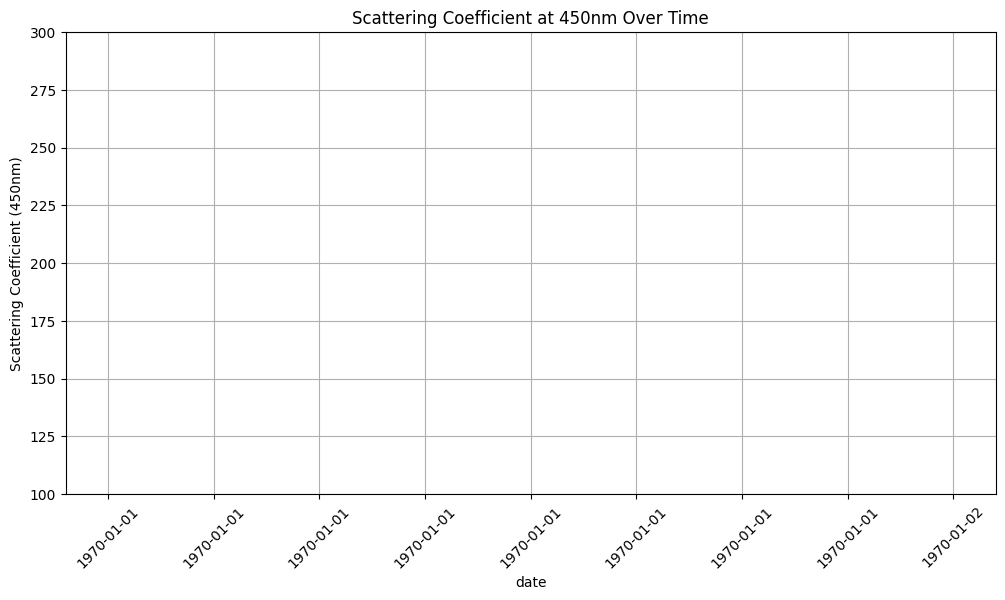

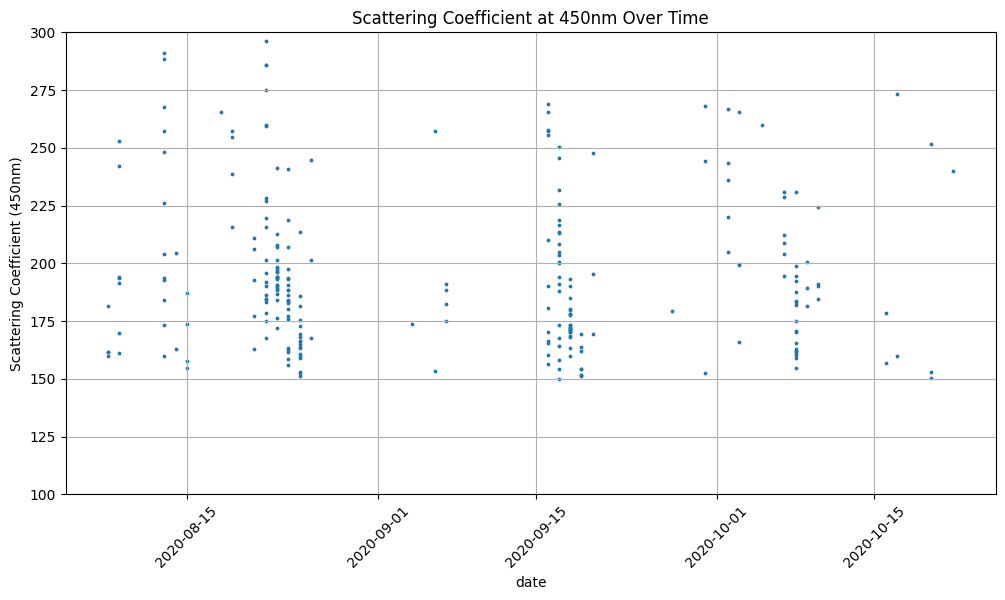

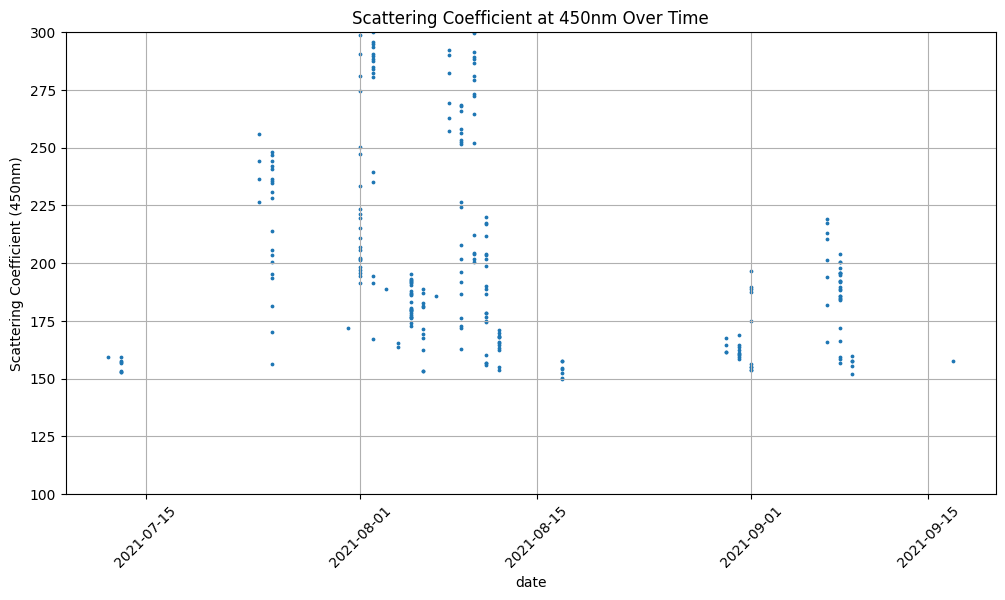

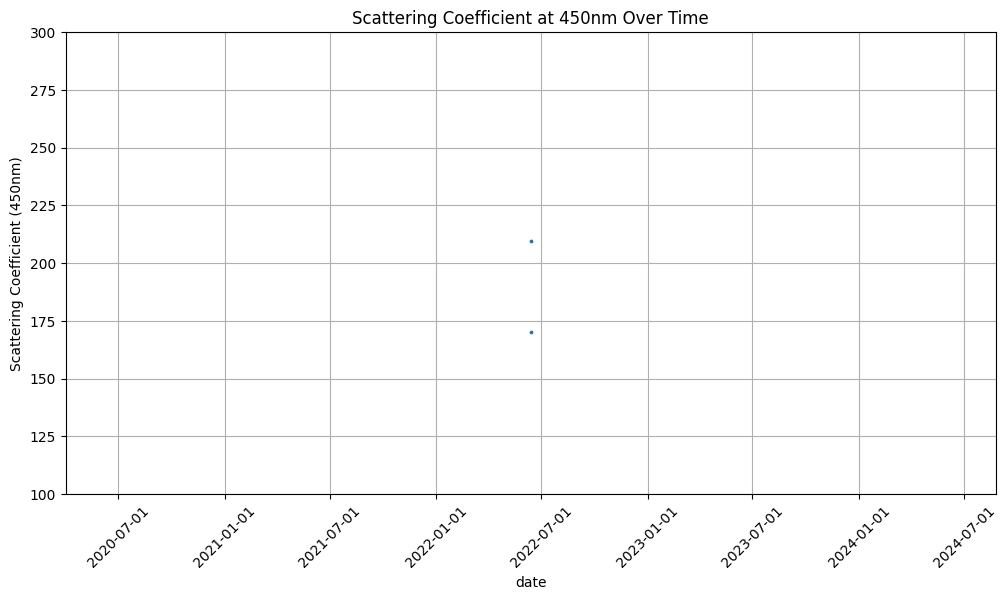

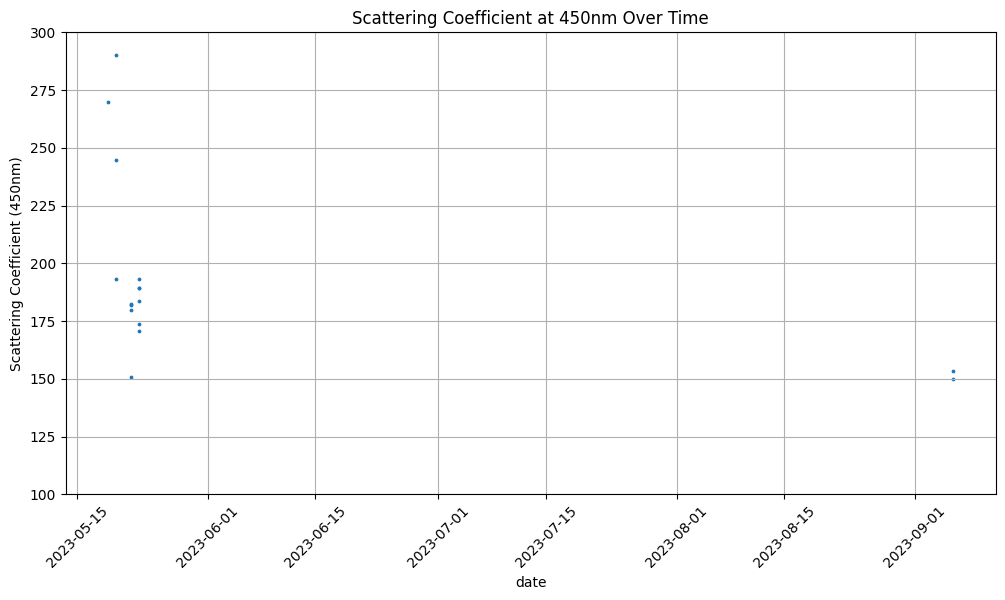

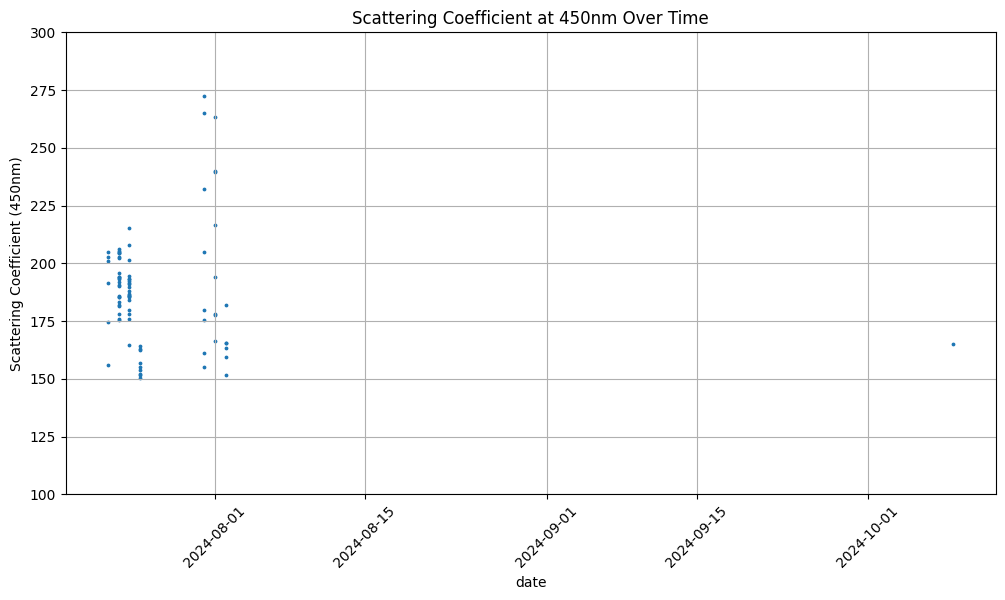

Year: 2019
Series([], dtype: int64)
Year: 2020
date
2020-08-08     4
2020-08-09     7
2020-08-13    12
2020-08-14     2
2020-08-15     4
2020-08-18     2
2020-08-19     5
2020-08-21     5
2020-08-22    24
2020-08-23    24
2020-08-24    22
2020-08-25    18
2020-08-26     3
dtype: int64
Year: 2021
date
2021-08-01    24
2021-08-02    24
2021-08-03     1
2021-08-04     2
2021-08-05    24
2021-08-06    11
2021-08-07     9
2021-08-08    24
2021-08-09    19
2021-08-10    19
2021-08-11    20
2021-08-12    12
2021-08-17     7
2021-08-30     4
2021-08-31     9
dtype: int64
Year: 2022
Series([], dtype: int64)
Year: 2023
Series([], dtype: int64)
Year: 2024
date
2024-08-01    8
2024-08-02    7
dtype: int64


In [21]:
def aerosol_plots(columns):
    dataframe = columns[6]
    new_dataframe = []
    variable_columns = []

    

    new_dictionary = {
        'scattering_coeff': columns[3], 
        'scattering_angstrom': columns[4],
        'starttime': columns[0],
        'date': columns[5]
    }
        
    for variable in new_dictionary.keys():    
        variable_columns.append(new_dictionary[variable])
        
    for new_variable in variable_columns:
        
        for coeff in new_variable:       
            
            if 'pm1_scattering_coeff_450' in coeff:
                new_dataframe.append(coeff)
                
            elif 'starttime' in coeff:
                new_dataframe.append(coeff)         
                
            elif 'date' in coeff:
                new_dataframe.append(coeff)  
    
    df = pd.DataFrame(dataframe[new_dataframe]).dropna()
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    df = df[df['pm1_scattering_coeff_450'] >= 150]
    df['date'] = pd.to_datetime(df['date'])

    target_years = [2019, 2020, 2021, 2022, 2023, 2024] 
    original_target_months = [5, 6, 7, 8, 9, 10]  
    target_months = [8,9]  


    for year in target_years:
       
        filtered_df = df[(df['date'].dt.year == year) & (df['date'].dt.month.isin(original_target_months))]        
        plt.figure(figsize=(12, 6))
        plt.scatter(filtered_df['date'], filtered_df['pm1_scattering_coeff_450'], s=3)
        plt.title('Scattering Coefficient at 450nm Over Time')
        plt.xlabel('date')
        plt.ylabel('Scattering Coefficient (450nm)')
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())  
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.xticks(rotation=45)
        plt.ylim(100, 300)
        plt.grid()
        plt.show()    

    for year in target_years:
            filtered_df = df[(df['date'].dt.year == year) & (df['date'].dt.month == target_months[0])]
            grouped = filtered_df.groupby('date').size()  
            print(f"Year: {year}")
            print(grouped) 

columns = adjusted_coefficients(table_mountain_data)
aerosol_plots(columns)